Dataset yang akan digunakan:
1. Bank Central Asia (BBCA) dari https://finance.yahoo.com/quote/BBCA.JK/ (30/09/2005 s.d 10/06/2022)

Model yang akan digunakan:
1. Support Vector Machine (SVM)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go

from sklearn import svm
from sklearn.metrics import mean_squared_error

#Load Dataset


Dataset yang akan digunakan diambil dari website yahoo finance. dengan emiten PT. Bank Central Asia (BBCA)

In [2]:
df_bca = pd.read_csv("BBCA.JK.csv") #index_col = "Date")

In [3]:
df_bca.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-30,345.0,345.0,340.0,345.0,250.267136,159610000
1,2005-10-03,345.0,345.0,337.5,345.0,250.267136,192690000
2,2005-10-04,360.0,360.0,345.0,360.0,261.148376,556150000
3,2005-10-05,352.5,360.0,345.0,352.5,255.707718,198820000
4,2005-10-06,352.5,352.5,345.0,352.5,255.707718,137980000


In [4]:
df_bca.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4128,2022-06-06,7550.0,7575.0,7425.0,7450.0,7450.0,81140300
4129,2022-06-07,7300.0,7475.0,7300.0,7375.0,7375.0,129242500
4130,2022-06-08,7500.0,7600.0,7425.0,7600.0,7600.0,108910500
4131,2022-06-09,7500.0,7575.0,7500.0,7500.0,7500.0,107828300
4132,2022-06-10,7400.0,7450.0,7350.0,7350.0,7350.0,111768600


In [5]:
df_bca.shape

(4133, 7)

In [6]:
df_bca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4133 non-null   object 
 1   Open       4133 non-null   float64
 2   High       4133 non-null   float64
 3   Low        4133 non-null   float64
 4   Close      4133 non-null   float64
 5   Adj Close  4133 non-null   float64
 6   Volume     4133 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 226.1+ KB


In [7]:
df_bca.duplicated().value_counts()

False    4133
dtype: int64

In [8]:
df_bca.drop_duplicates()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-30,345.0,345.0,340.0,345.0,250.267136,159610000
1,2005-10-03,345.0,345.0,337.5,345.0,250.267136,192690000
2,2005-10-04,360.0,360.0,345.0,360.0,261.148376,556150000
3,2005-10-05,352.5,360.0,345.0,352.5,255.707718,198820000
4,2005-10-06,352.5,352.5,345.0,352.5,255.707718,137980000
...,...,...,...,...,...,...,...
4128,2022-06-06,7550.0,7575.0,7425.0,7450.0,7450.000000,81140300
4129,2022-06-07,7300.0,7475.0,7300.0,7375.0,7375.000000,129242500
4130,2022-06-08,7500.0,7600.0,7425.0,7600.0,7600.000000,108910500
4131,2022-06-09,7500.0,7575.0,7500.0,7500.0,7500.000000,107828300


Dari info data diatas dapat dilihat bawah: 
1. Dataset tidak memiliki data yang hilang atau kosong.
2. Dataset memiliki 7 fitur dan 4133 data
    
    a. Date = Tanggal
    
    b. Open = Harga pembukaan
    
    c. High = Harga tertinggi
    
    d. Low = Harga terendah
    
    e. Close = Harga penutupan
    
    f. Adj. Close = 
    
    g. Volume = 


#Data Visualization

In [9]:
df_bca['Date'] = df_bca['Date'].astype('datetime64')

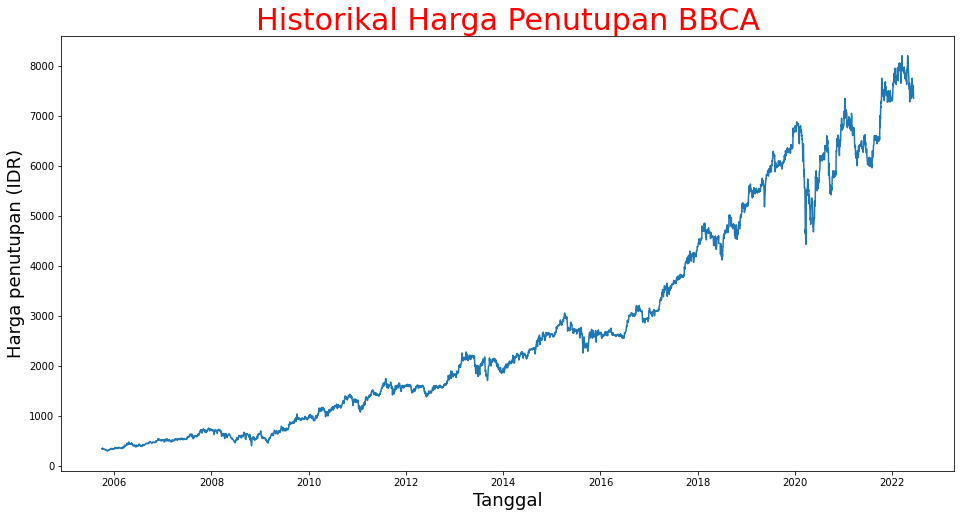

In [10]:
plt.figure(figsize=(16,8))
plt.title('Historikal Harga Penutupan BBCA', fontsize=30, color='red')
plt.plot(df_bca['Date'], df_bca['Close'])
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Harga penutupan (IDR)', fontsize=18)
plt.show()

#Pemilihan Fitur

In [11]:
df_bca_ = df_bca.copy()
df_bca_.reset_index(inplace=True)
df_bca_fix = df_bca_.get(['Date', 'Close'])
df_bca_fix = df_bca_fix.set_index("Date")

In [12]:
df_bca_fix.head()

,Close
Date,
2005-09-30,345.0
2005-10-03,345.0
2005-10-04,360.0
2005-10-05,352.5
2005-10-06,352.5


#Pembagian Dataset

In [13]:
df_fix = df_bca_fix.get(['Close'])

# Memisahkan data untuk training/testing
df_X_train = df_fix[:-826]
df_X_test = df_fix[-826:]

# Memisahkan target untuk training/testing
df_y_train = df_fix[:-826]
df_y_test = df_fix[-826:]

Dataset dibagi menjadi 80% untuk Train dan 20% untuk Test

#Modelling

In [14]:
# buat objek SVM regression

regr_svm2 = svm.LinearSVR()
regr_svm2.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [15]:
# Train model dengan training set
regr_svm2.fit(df_X_train, df_y_train)

# buat prediksi dengan data testing
df_y_pred = regr_svm2.predict(df_X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Evaluasi Model

In [16]:
# Nilai koefesien The coefficients
print('Coefficients: \n', regr_svm2.coef_)
# RMSE
print('RMSE: %.2f'
      % mean_squared_error(df_y_test, df_y_pred, squared = False))

Coefficients: 
 [0.99999985]
RMSE: 0.00


Dengan menggunakan model Support Vector Machine untuk memprediksi harga saham BCA didapatkan:

1. Nilai Koofesiennya adalah 0.99999996

2. NIlai RMSE adalah 0.00

#Visualisasi Prediksi Harga Saham BBCA

In [17]:
#membuat dataframe
train = df_fix[:-826]
valid = df_fix[-826:]
valid['Predictions'] = df_y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
print(train.head())
print(train.shape)

            Close
Date             
2005-09-30  345.0
2005-10-03  345.0
2005-10-04  360.0
2005-10-05  352.5
2005-10-06  352.5
(3307, 1)


In [19]:
print(valid.head())
print(valid.shape)

             Close  Predictions
Date                           
2019-02-01  5635.0  5634.999241
2019-02-04  5500.0  5499.999261
2019-02-05  5500.0  5499.999261
2019-02-06  5535.0  5534.999256
2019-02-07  5530.0  5529.999257
(826, 2)


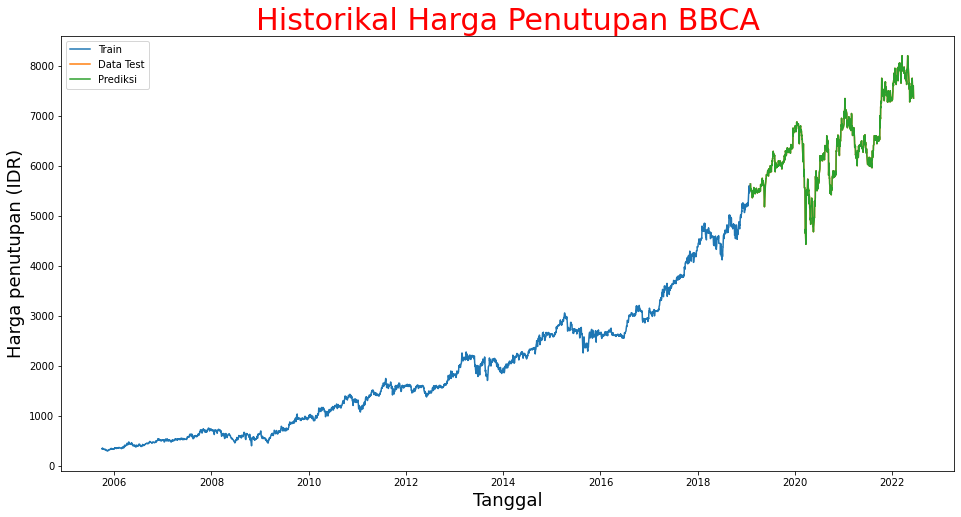

In [20]:
plt.figure(figsize=(16,8))
plt.title('Historikal Harga Penutupan BBCA', fontsize=30, color='red')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Harga penutupan (IDR)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Data Test', 'Prediksi'], loc='best')
plt.show()

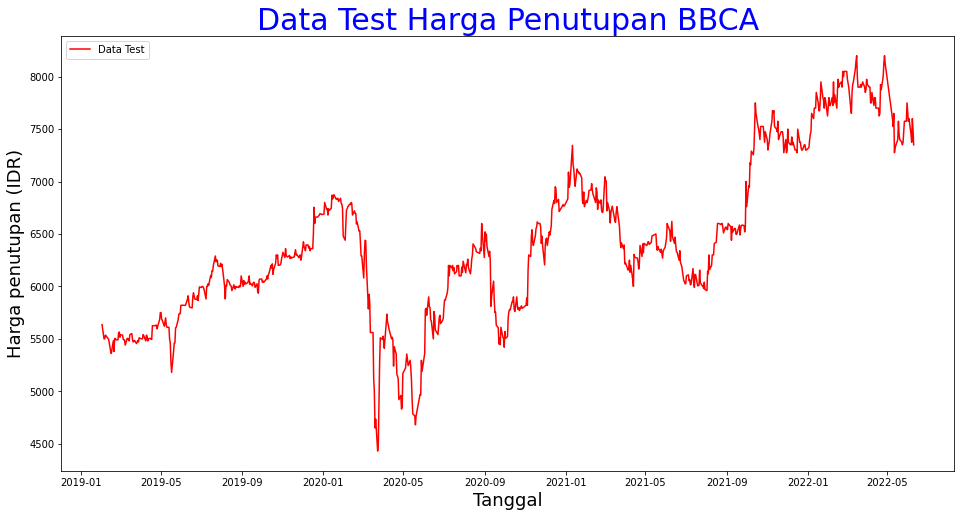

In [21]:
plt.figure(figsize=(16,8))
plt.title('Data Test Harga Penutupan BBCA', fontsize=30, color='blue')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Harga penutupan (IDR)', fontsize=18)
plt.plot(valid[['Close']], color='red')
plt.legend(['Data Test'], loc='best')
plt.show()

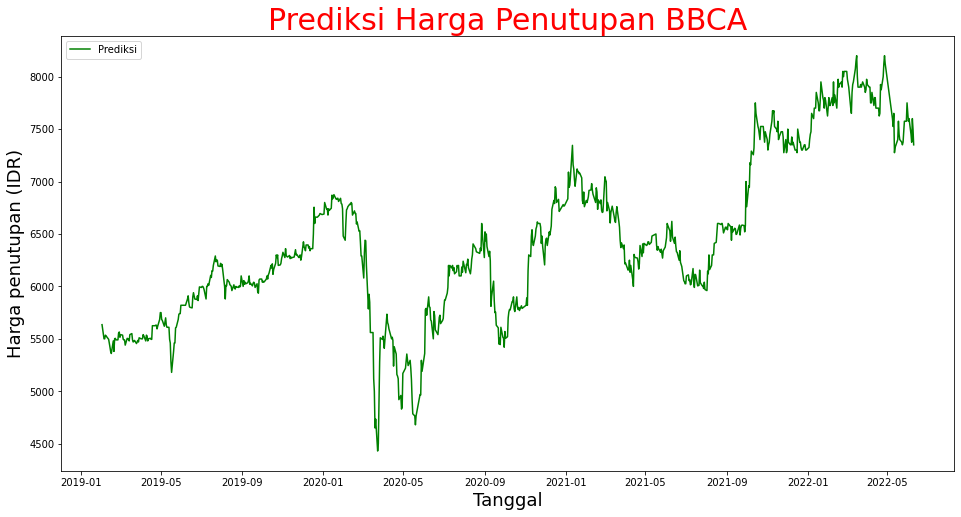

In [22]:
plt.figure(figsize=(16,8))
plt.title('Prediksi Harga Penutupan BBCA', fontsize=30, color='red')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Harga penutupan (IDR)', fontsize=18)
plt.plot(valid[['Predictions']], color='green')
plt.legend(['Prediksi'], loc='best')
plt.show()